## MILP tutorial 3 : add a time dimension

This tutorial requires a full understanding of the previous tutorials of the serie

In this tutorial, we add a time dimension to our problems, solving not only one value problem but n at the same time. 

####   Linear problem with a time dimension

We reproduce here the same problem as in tutorial 1: a minimalistic energy mix problem where we have two production means that can be used in order to answer to a energy load. In this tutorial however, the load is variable with time. The problem properties at each time step are the following:

-   20 time steps
-   0 MW <= Load(t) <= 20 MW
-   Prod1 :
    - maximum power : 15MW
    - price : 1€ / MW
-   Prod2 :
    - maximum power : 15MW
    - price : 5€ / MW

Intuitively, the Prod1 mean is expected to provide the load below 15MW, and the Prod2 is expected to supply the remaining load.

In [1]:
# Import the Docplex Model object that manages the problem and its resolution
import math
import matplotlib.pyplot as plt
from docplex.mp.model import Model

model = Model()

The docplex module has a function to get several variables at a time, contained in a list. We could instead loop on the continuous_var fonction to get the same result. In our case we request 20 variables each (one per time step).

In [2]:
production_1 = model.continuous_var_list(20, lb=0, ub=15, name="production_1")
production_2 = model.continuous_var_list(20, lb=0, ub=15, name="production_2")

print(production_1)

[docplex.mp.Var(type=C,name='production_1_0',ub=15), docplex.mp.Var(type=C,name='production_1_1',ub=15), docplex.mp.Var(type=C,name='production_1_2',ub=15), docplex.mp.Var(type=C,name='production_1_3',ub=15), docplex.mp.Var(type=C,name='production_1_4',ub=15), docplex.mp.Var(type=C,name='production_1_5',ub=15), docplex.mp.Var(type=C,name='production_1_6',ub=15), docplex.mp.Var(type=C,name='production_1_7',ub=15), docplex.mp.Var(type=C,name='production_1_8',ub=15), docplex.mp.Var(type=C,name='production_1_9',ub=15), docplex.mp.Var(type=C,name='production_1_10',ub=15), docplex.mp.Var(type=C,name='production_1_11',ub=15), docplex.mp.Var(type=C,name='production_1_12',ub=15), docplex.mp.Var(type=C,name='production_1_13',ub=15), docplex.mp.Var(type=C,name='production_1_14',ub=15), docplex.mp.Var(type=C,name='production_1_15',ub=15), docplex.mp.Var(type=C,name='production_1_16',ub=15), docplex.mp.Var(type=C,name='production_1_17',ub=15), docplex.mp.Var(type=C,name='production_1_18',ub=15), do

The load is here set to a sinusoidal value with time.

In [3]:
load = [15+5*math.sin(i/2) for i in range(20)]

The constraints can now be added at each time step. We can note that the time steps are not correlated, so solving every time steps at once corresponds to solving n models of 1 time step.

The objective is incremented with the price of the production means at each time step

In [4]:
objective = 0
for i in range(20):
    model += production_1[i] + production_2[i] == load[i]
    objective += 1 * production_1[i] + 5 * production_2[i]

We can now provide the objective of the model that we are willing to minimize.

In [5]:
model.set_objective("min", objective)

For education purposes, it can be very informative to write down the model that the solver will read, it can be done using the command:

In [6]:
model.export_as_lp("my_multiple_lp_problem.lp")

'my_multiple_lp_problem.lp'

The problem can now be solved and the results imported from the solver.

In [7]:
model.solve(log_output = True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 20 rows and 40 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.01 ticks)


docplex.mp.solution.SolveSolution(obj=478.913,values={production_1_0:15,..

The following plots the respective production of both means, we can see that "Production 1" produces as much as possible limited by its capacity, and "Production 2" produces the rest.

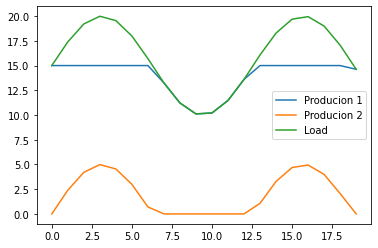

In [8]:
prod_1_solution = [val.solution_value for val in production_1]
prod_2_solution = [val.solution_value for val in production_2]

plt.plot(range(0,20), prod_1_solution, label = "Producion 1")
plt.plot(range(0,20), prod_2_solution, label = "Producion 2")
plt.plot(range(0,20), load, label = "Load")

plt.legend()
plt.show()